<a href="https://colab.research.google.com/github/fiqihalfito/Detect-Vegetable-Image-Using-Tensorflow/blob/main/Proyek_Akhir_Image_Classification_Model_Deployment_Fiqih_Alfito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fiqih Alfito

Link Dataset : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [ ]:
# ====================== Data Diri =======================================

# Nama        : Fiqih Alfito
# Link dataset : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

# ========================================================================

# Init Kaggle

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fiqihalfitodev","key":"d5fb19f8302a0e4c2acdd5118fe216c1"}'}

In [3]:
!mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           6903        221  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5551        178  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1370         33  1.0              
whenamancodes/students-performance-in-exams                     S

In [8]:
! kaggle datasets download -d misrakahmed/vegetable-image-dataset

 98% 524M/534M [00:03<00:00, 158MB/s]
100% 534M/534M [00:03<00:00, 147MB/s]


In [9]:
! mkdir vegetable-dataset

In [ ]:
! unzip vegetable-image-dataset.zip -d vegetable-dataset

# Create Model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [13]:
TRAINING_DIR = "vegetable-dataset/Vegetable Images/train"
VALIDATION_DIR = "vegetable-dataset/Vegetable Images/validation"
 
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest',
    # validation_split=0.2,
)
 
# train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                     class_mode='categorical',
#                                                     target_size=(224, 224),
#                                                     subset='training')

# validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                          class_mode='categorical',
#                                                          target_size=(224, 224),
#                                                          subset='validation')


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))
# ===============================================
# the generator below is used to get data in validation folder because validation folder already exists
# so we don't have to use validation_split if we use the generator below
# ===============================================
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 and logs.get('val_accuracy')>=0.92):
      print("\nAkurasi dan val_accuracy telah mencapai >= 92%!")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
mobilenet = MobileNetV2( include_top=False , weights="imagenet" , input_shape=(224,224,3))
for layer in mobilenet.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same',
                  input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax'),
])


 

int_lr = 1e-4
optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 64)          737344    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                       

Fit model

In [16]:

num_epochs = 30

history = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=validation_generator,
              callbacks=[callbacks])

Epoch 1/30
469/469 [==============================] - 190s 382ms/step - loss: 0.3780 - accuracy: 0.8920 - val_loss: 0.0303 - val_accuracy: 0.9893
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9776
Akurasi dan val_accuracy telah mencapai >= 92%!
469/469 [==============================] - 178s 381ms/step - loss: 0.0717 - accuracy: 0.9776 - val_loss: 0.0236 - val_accuracy: 0.9930


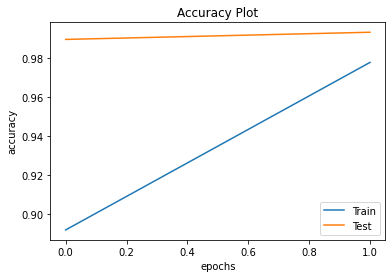

In [17]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

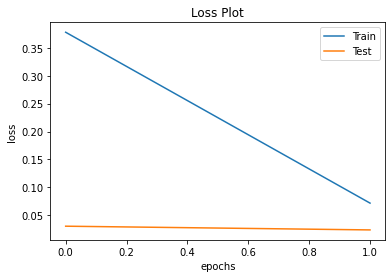

In [18]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# save Model to Tensorflow Lite format

In [ ]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

12411144

# Predict model

Saving capsicum.jpg to capsicum.jpg
1/1 [==============================] - 0s 21ms/step
[[4.1694922e-05 4.9567097e-05 3.8062157e-05 1.0763994e-02 1.8045923e-05
  4.0331364e-05 9.8203063e-01 3.2445729e-05 4.6972124e-05 2.9646144e-05
  2.4434127e-04 1.7991277e-05 6.0816045e-04 4.5157831e-05 5.9928964e-03]]
6


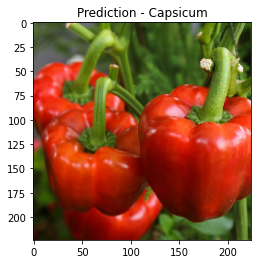

In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
 
  imgplot = plt.imshow(img)
  img_array = image.img_to_array(img)
  xx = np.expand_dims(img_array, axis=0)
  # images = np.vstack([x])
  xx /= 255.
 
  classes = model.predict(xx)
  print(classes)
  index = np.argmax(classes) 
  print(index)
  plt.title("Prediction - {}".format(category[index]))
  plt.imshow(img_array)
